In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyparsing

Note: you may need to restart the kernel to use updated packages.


In [2]:
promotion = pd.read_csv("D:\Term 2\Machine Learning\Working Directory\promotion_tr_MLB.csv")

In [48]:
promotion.head()

employee_id         department  education gender recruitment_channel  \
0        65438  Sales & Marketing          3      f            sourcing   
1        65141         Operations          2      m               other   
2         7513  Sales & Marketing          2      m            sourcing   
3         2542  Sales & Marketing          2      m               other   
4        48945         Technology          2      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                     5                  8   
1                1   30                     5                  4   
2                1   34                     3                  7   
3                2   39                     1                 10   
4                1   45                     3                  2   

   KPIs_met >80%  ...  is_promoted  Analytics  Finance  HR  Legal  Operations  \
0              1  ...            0          0        0   0      0           0   
1              0  ...            0          0        0   0      0           1   
2              0  ...            0          0        0   0      0           0   
3              0  ...            0          0        0   0      0           0   
4              0  ...            0          0        0   0      0           0   

   Procurement  R&D  Sales & Marketing  Technology  
0            0    0                  1           0  
1            0    0                  0           0  
2            0    0                  1           0  
3            0    0                  1           0  
4            0    0                  0           1  

[5 rows x 22 columns]

In [4]:
promotion.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54807.000000     54807.000000  54807.000000          54807.000000   
mean   39195.247103         1.253015     34.804988              3.330797   
std    22586.374376         0.609269      7.663652              1.218724   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.500000         1.000000     29.000000              3.000000   
50%    39225.000000         1.000000     33.000000              3.000000   
75%    58729.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     89.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54807.000000   54807.000000  54807.000000        54807.000000   
mean            5.865601       0.351981      0.023355           63.386629   
std             4.265082       0.477592      0.156371           13.371652   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000     10.000000           99.000000   

        is_promoted  
count  54807.000000  
mean       0.085172  
std        0.279139  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [5]:
promotion.isna().sum()

employee_id             0
department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Binary

In [6]:
promotion["education"].replace({"Below Secondary":1,"Bachelor's":2,"Master's & above":3},inplace=True)

In [7]:
promotion["education"].unique()

array([3, 2, 1], dtype=int64)

# Dummy

In [8]:
Dummy = pd.get_dummies(promotion['department'])
promotion = pd.concat([promotion,Dummy],axis=1)

In [9]:
promotion.head(30)

employee_id         department  education gender recruitment_channel  \
0         65438  Sales & Marketing          3      f            sourcing   
1         65141         Operations          2      m               other   
2          7513  Sales & Marketing          2      m            sourcing   
3          2542  Sales & Marketing          2      m               other   
4         48945         Technology          2      m               other   
5         58896          Analytics          2      m            sourcing   
6         20379         Operations          2      f               other   
7         16290         Operations          3      m            sourcing   
8         73202          Analytics          2      m               other   
9         28911  Sales & Marketing          3      m            sourcing   
10        29934         Technology          2      m            sourcing   
11        49017  Sales & Marketing          2      f            sourcing   
12        60051  Sales & Marketing          2      m            sourcing   
13        38401         Technology          3      m               other   
14        77040                R&D          3      m            sourcing   
15        43931         Operations          2      m               other   
16         7152         Technology          2      m               other   
17         9403  Sales & Marketing          2      m               other   
18        17436  Sales & Marketing          2      m               other   
19        54461         Operations          2      m               other   
20        12067        Procurement          2      m               other   
21        33332         Operations          2      m            sourcing   
22        58789            Finance          2      f               other   
23        52057            Finance          3      m            sourcing   
24        26585         Technology          2      m               other   
25        37749        Procurement          2      m               other   
26         2370         Technology          2      m               other   
27         8219          Analytics          2      m               other   
28        74759  Sales & Marketing          2      m            sourcing   
29        27395        Procurement          2      m            sourcing   

    no_of_trainings  age  previous_year_rating  length_of_service  \
0                 1   35                     5                  8   
1                 1   30                     5                  4   
2                 1   34                     3                  7   
3                 2   39                     1                 10   
4                 1   45                     3                  2   
5                 2   31                     3                  7   
6                 1   31                     3                  5   
7                 1   33                     3                  6   
8                 1   28                     4                  5   
9                 1   32                     5                  5   
10                1   30                     3                  1   
11                1   35                     5                  3   
12                1   49                     5                  5   
13                2   39                     3                 16   
14                1   37                     3                  7   
15                1   37                     1                 10   
16                1   38                     3                  5   
17                1   34                     1                  4   
18                1   34                     5                  8   
19                1   37                     3                  9   
20                1   35                     3                  7   
21                1   41                     4                 11   
22                1   28                     3              

# Correlation

In [10]:
corrmat = promotion.corr()

C:\Users\aryan\AppData\Local\Temp\ipykernel_17212\3541594116.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = promotion.corr()


In [11]:
corrmat

employee_id  education  no_of_trainings       age  \
employee_id              1.000000   0.003037        -0.005110  0.000510   
education                0.003037   1.000000        -0.031233  0.384627   
no_of_trainings         -0.005110  -0.031233         1.000000 -0.081300   
age                      0.000510   0.384627        -0.081300  1.000000   
previous_year_rating     0.003199   0.012300        -0.061142  0.004961   
length_of_service        0.001304   0.263468        -0.057284  0.656809   
KPIs_met >80%           -0.002482   0.007163        -0.045582 -0.025684   
awards_won?              0.009408   0.002494        -0.007825 -0.006781   
avg_training_score      -0.000599   0.036439         0.042521 -0.048507   
is_promoted              0.001214   0.027348        -0.024898 -0.017201   
Analytics               -0.001283  -0.046842         0.045789 -0.101896   
Finance                  0.007145  -0.049490         0.018440 -0.078931   
HR                       0.007999  -0.004864        -0.070260 -0.011750   
Legal                   -0.006407  -0.051105        -0.037306 -0.017639   
Operations              -0.001589   0.002727        -0.077324  0.084594   
Procurement              0.005326   0.063615         0.044335  0.055348   
R&D                     -0.005751   0.100226         0.033409 -0.034887   
Sales & Marketing       -0.002628  -0.019062         0.026693  0.005099   
Technology              -0.003138   0.015278         0.004981  0.003141   

                      previous_year_rating  length_of_service  KPIs_met >80%  \
employee_id                       0.003199           0.001304      -0.002482   
education                         0.012300           0.263468       0.007163   
no_of_trainings                  -0.061142          -0.057284      -0.045582   
age                               0.004961           0.656809      -0.025684   
previous_year_rating              1.000000          -0.001205       0.365567   
length_of_service                -0.001205           1.000000      -0.077709   
KPIs_met >80%                     0.365567          -0.077709       1.000000   
awards_won?                       0.029066          -0.036194       0.092467   
avg_training_score                0.073826          -0.038112       0.078398   
is_promoted                       0.158911          -0.010676       0.221579   
Analytics                         0.057071          -0.071953       0.035933   
Finance                           0.030581          -0.054030       0.028985   
HR                                0.025599          -0.009167      -0.008016   
Legal                             0.007169          -0.041262      -0.005241   
Operations                        0.120642           0.065946       0.084266   
Procurement                      -0.008804           0.042294       0.020764   
R&D                               0.023898          -0.041885       0.018384   
Sales & Marketing                -0.134918           0.007291      -0.121177   
Technology                       -0.048941           0.004466      -0.006179   

                      awards_won?  avg_training_score  is_promoted  Analytics  \
employee_id              0.009408           -0.000599     0.001214  -0.001283   
education                0.002494            0.036439     0.027348  -0.046842   
no_of_trainings         -0.007825            0.042521    -0.024898   0.045789   
age                     -0.006781           -0.048507    -0.017201  -0.101896   
previous_year_rating     0.029066            0.073826     0.158911   0.057071   
length_of_service       -0.036194           -0.038112    -0.010676  -0.071953   
KPIs_met >80%            0.092467            0.078398     0.221579   0.035933   
awards_won?              1.000000            0.068154     0.188100   0.001968   
avg_training_score       0.068154            1.000000     0.181150   0.521966   
is_promoted              0.188100            0.181150     1.000000   0.012367   
Analytics                0.00

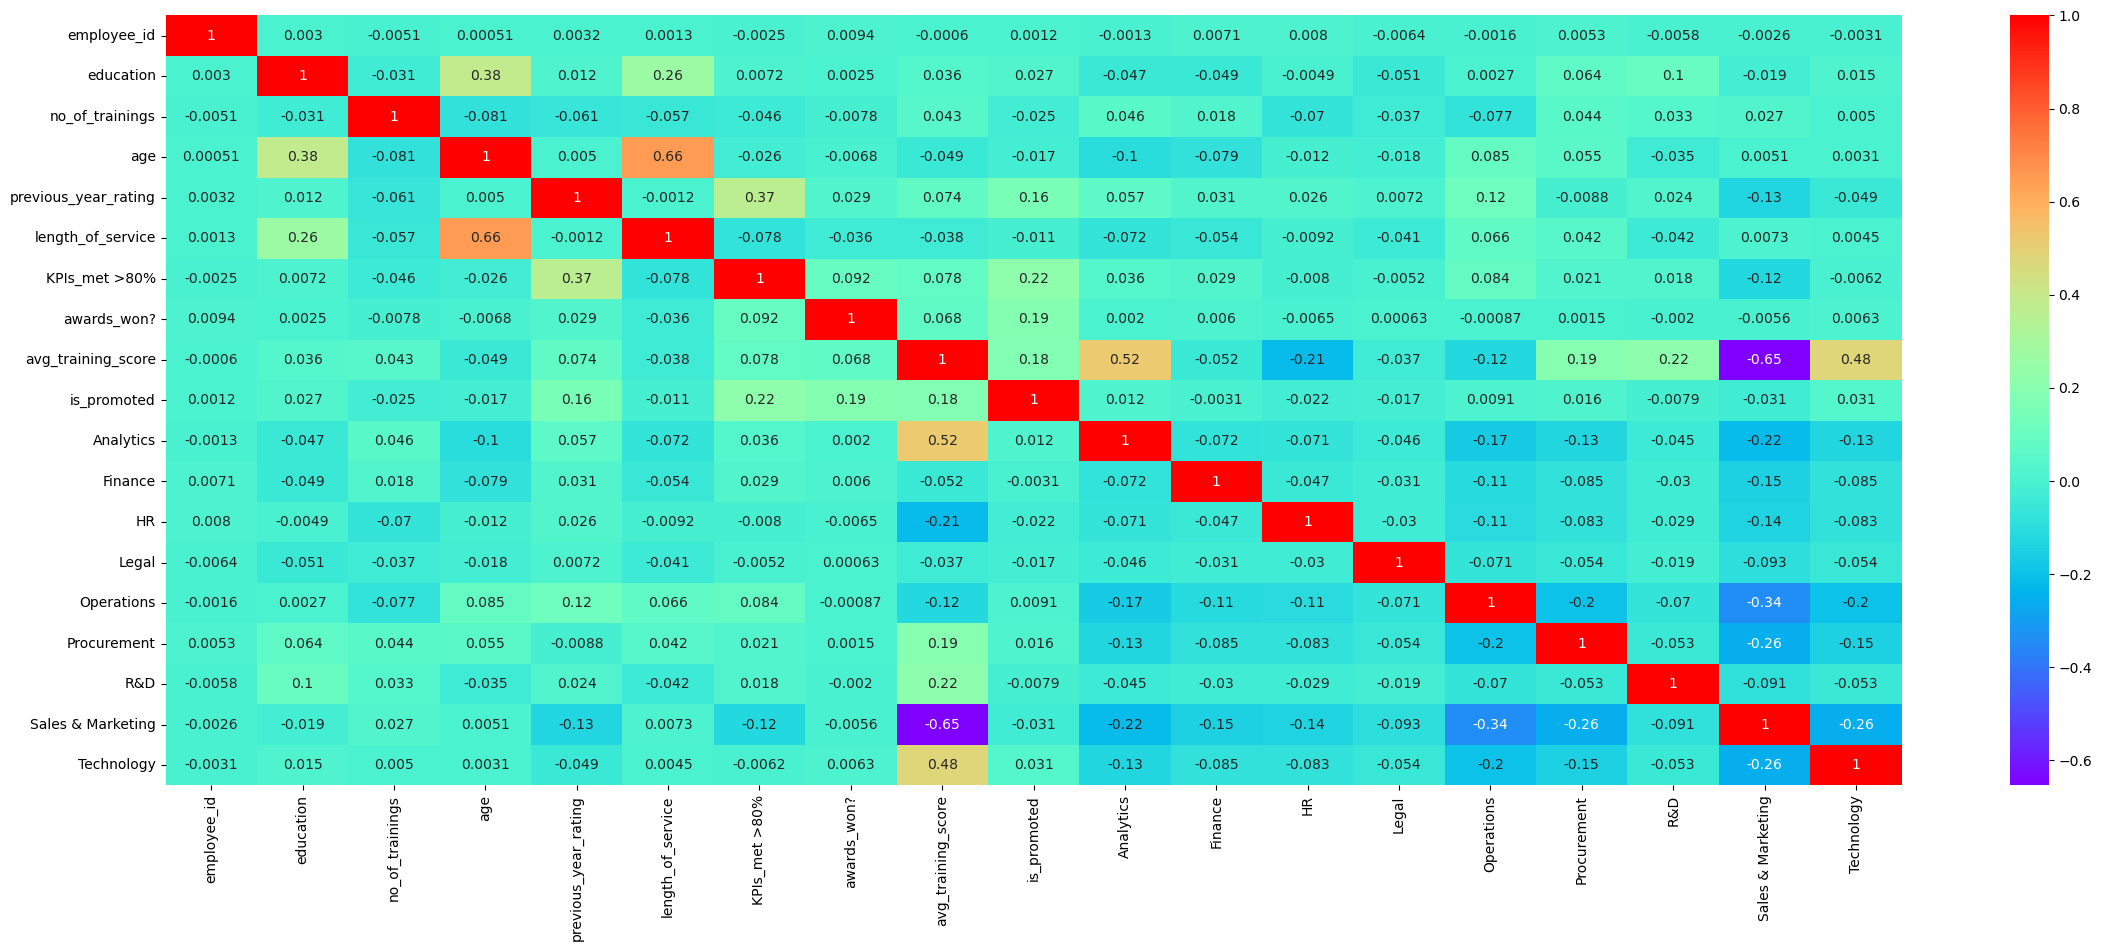

In [12]:
plt.figure(figsize=(28,10))
sns.heatmap(corrmat,annot=True,cmap="rainbow")
plt.show()

# Train and Test

In [13]:
list(promotion.columns)

['employee_id',
 'department',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted',
 'Analytics',
 'Finance',
 'HR',
 'Legal',
 'Operations',
 'Procurement',
 'R&D',
 'Sales & Marketing',
 'Technology']

In [14]:
Col = ['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'Analytics',
 'Finance',
 'HR',
 'Legal',
 'Operations',
 'Procurement',
 'R&D',
 'Sales & Marketing',
 'Technology','education']

x = promotion[Col] #all independent varible
y = promotion.is_promoted #dependent variable

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

# Hyper Parameter Tunning

In [15]:
parameters = {"criterion":["entropy","gini"],"max_depth": list(range(1,10))}

In [16]:
clf = DecisionTreeClassifier()

In [17]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf,param_grid=parameters,cv=10)

In [18]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [19]:
grid.best_estimator_ #pass the best estimator back to the model

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [20]:
grid.best_score_ #accuracy at the best estimator

0.9365550103093119

In [21]:
promotion['is_promoted'].value_counts()

0    50139
1     4668
Name: is_promoted, dtype: int64

# Decision Tree - Information Gain

In [22]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [23]:
model = clf.fit(x_train,y_train)

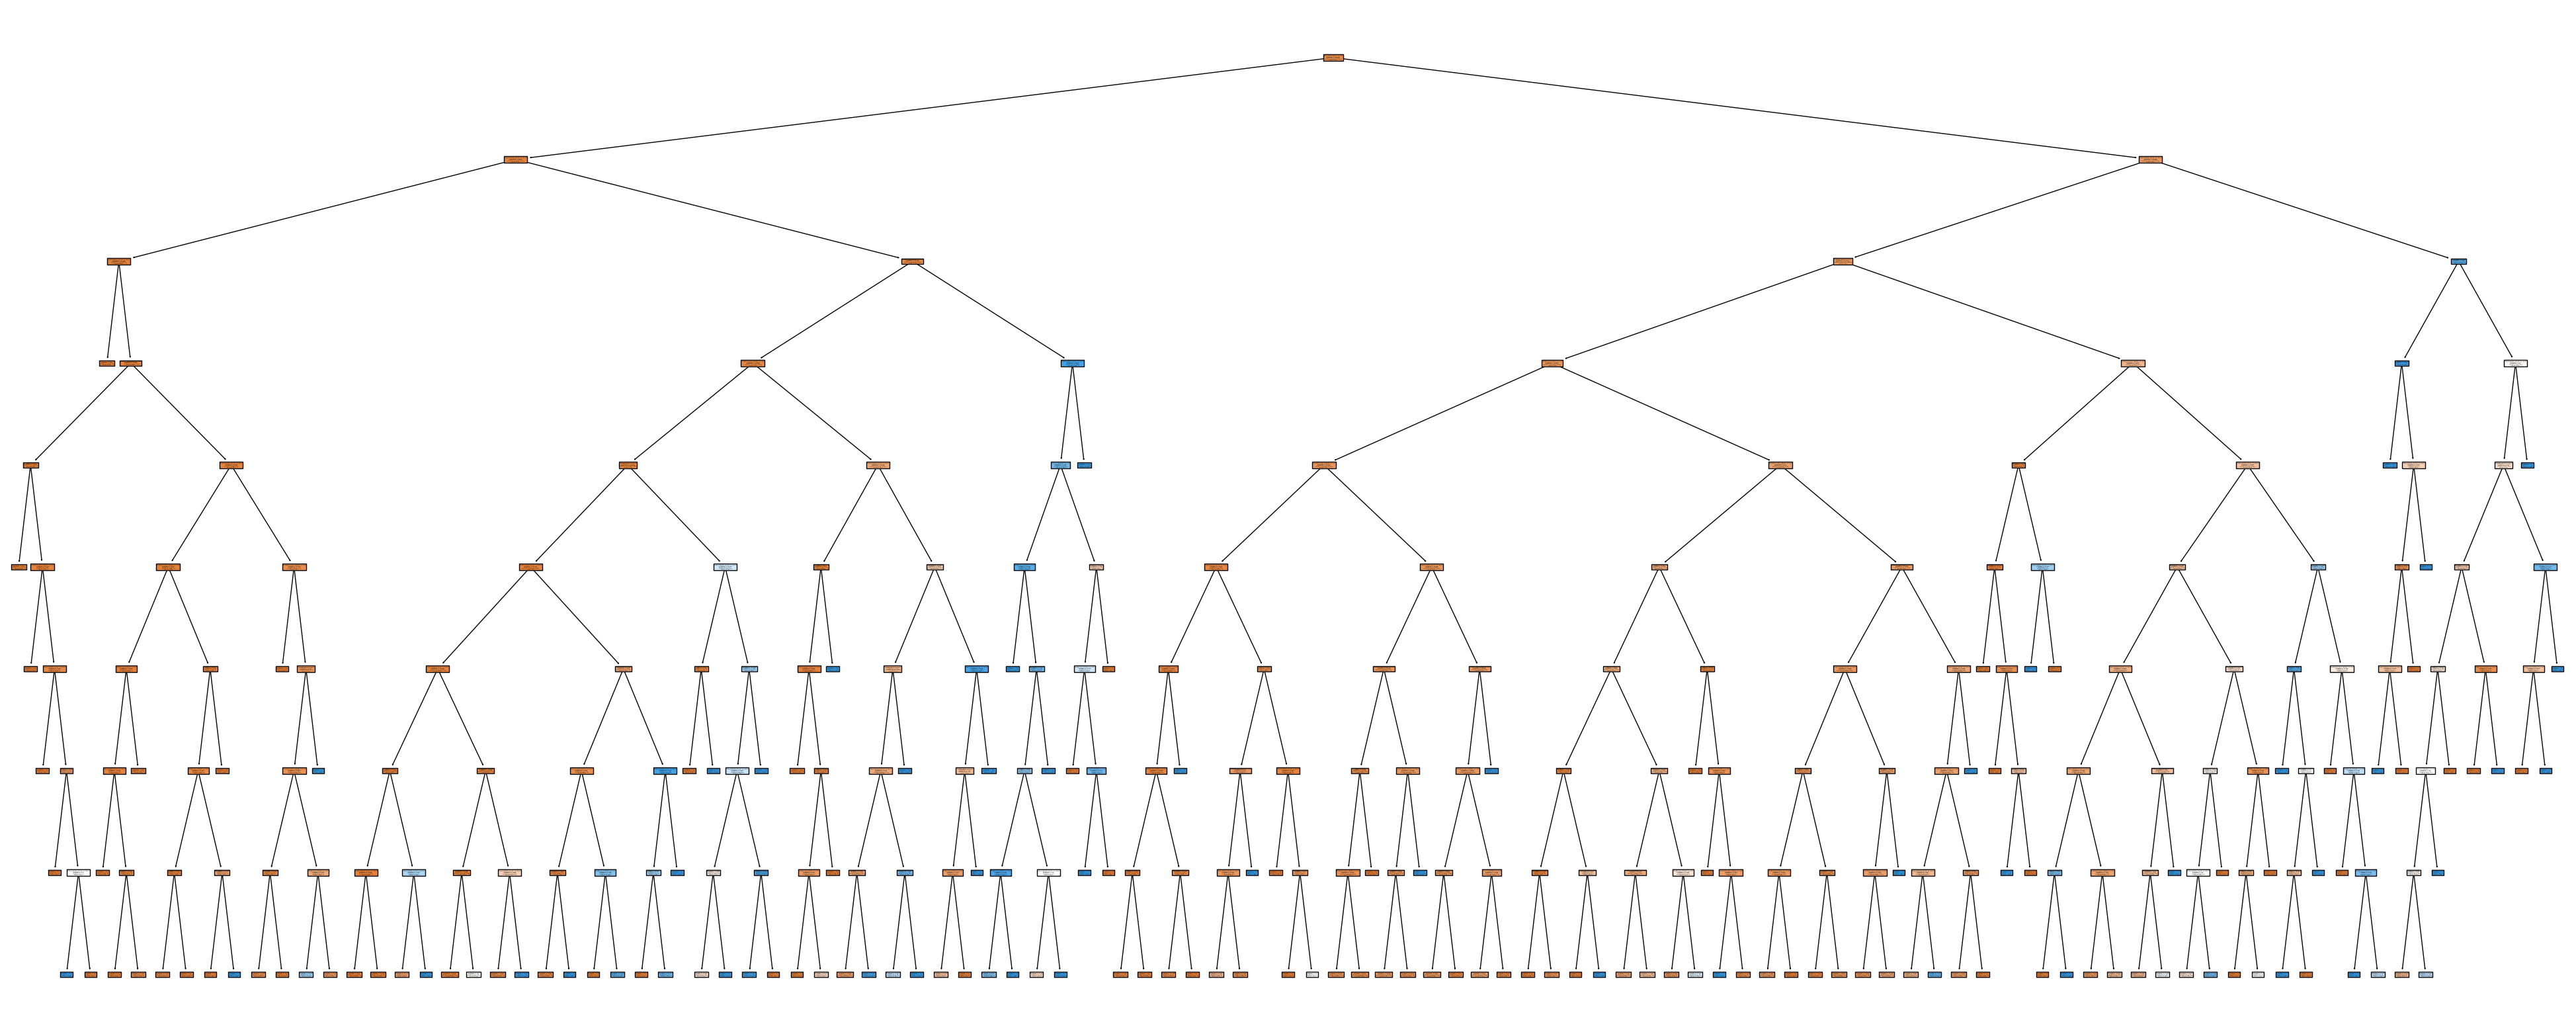

In [24]:
from sklearn import tree
fig = plt.figure(figsize=(50,20))
_=tree.plot_tree(clf,feature_names=Col,class_names=['No','Yes'],filled=True) #No is 0 and Yes is 1, _ means do not care
fig.savefig("dt.png")

In [25]:
y_pred = model.predict(x_test)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9354132457580734


In [27]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

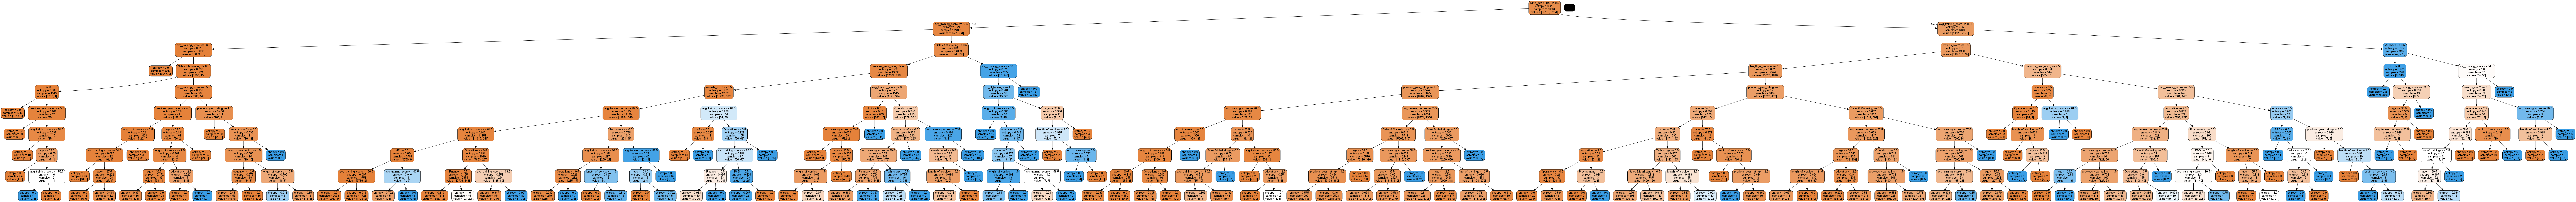

In [28]:
dot_data = export_graphviz(clf,filled=True,rounded=True, feature_names=Col)
graph=graph_from_dot_data(dot_data)
graph.write_png('clf.png')
Image(graph.create_png())

# Confusion Matrix - Information Gain

In [29]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

Text(0.5, 23.52222222222222, 'Predicted Label')

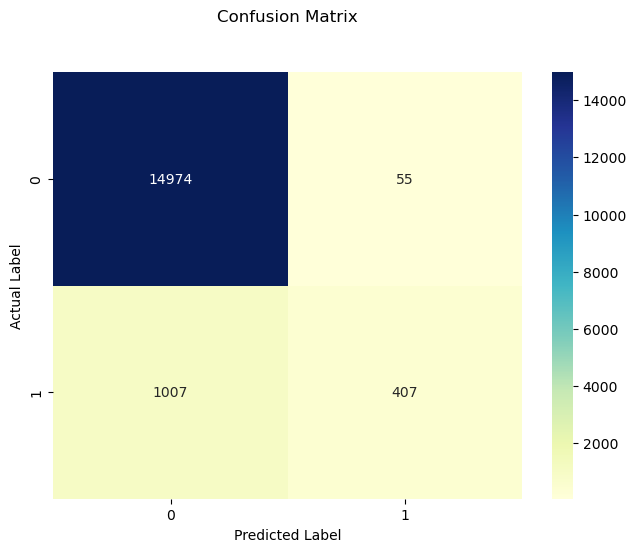

In [30]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Decision Tree - Gini Index

In [31]:
clf1 = DecisionTreeClassifier(criterion='gini', max_depth=9)

In [32]:
model1=clf1.fit(x_train,y_train)

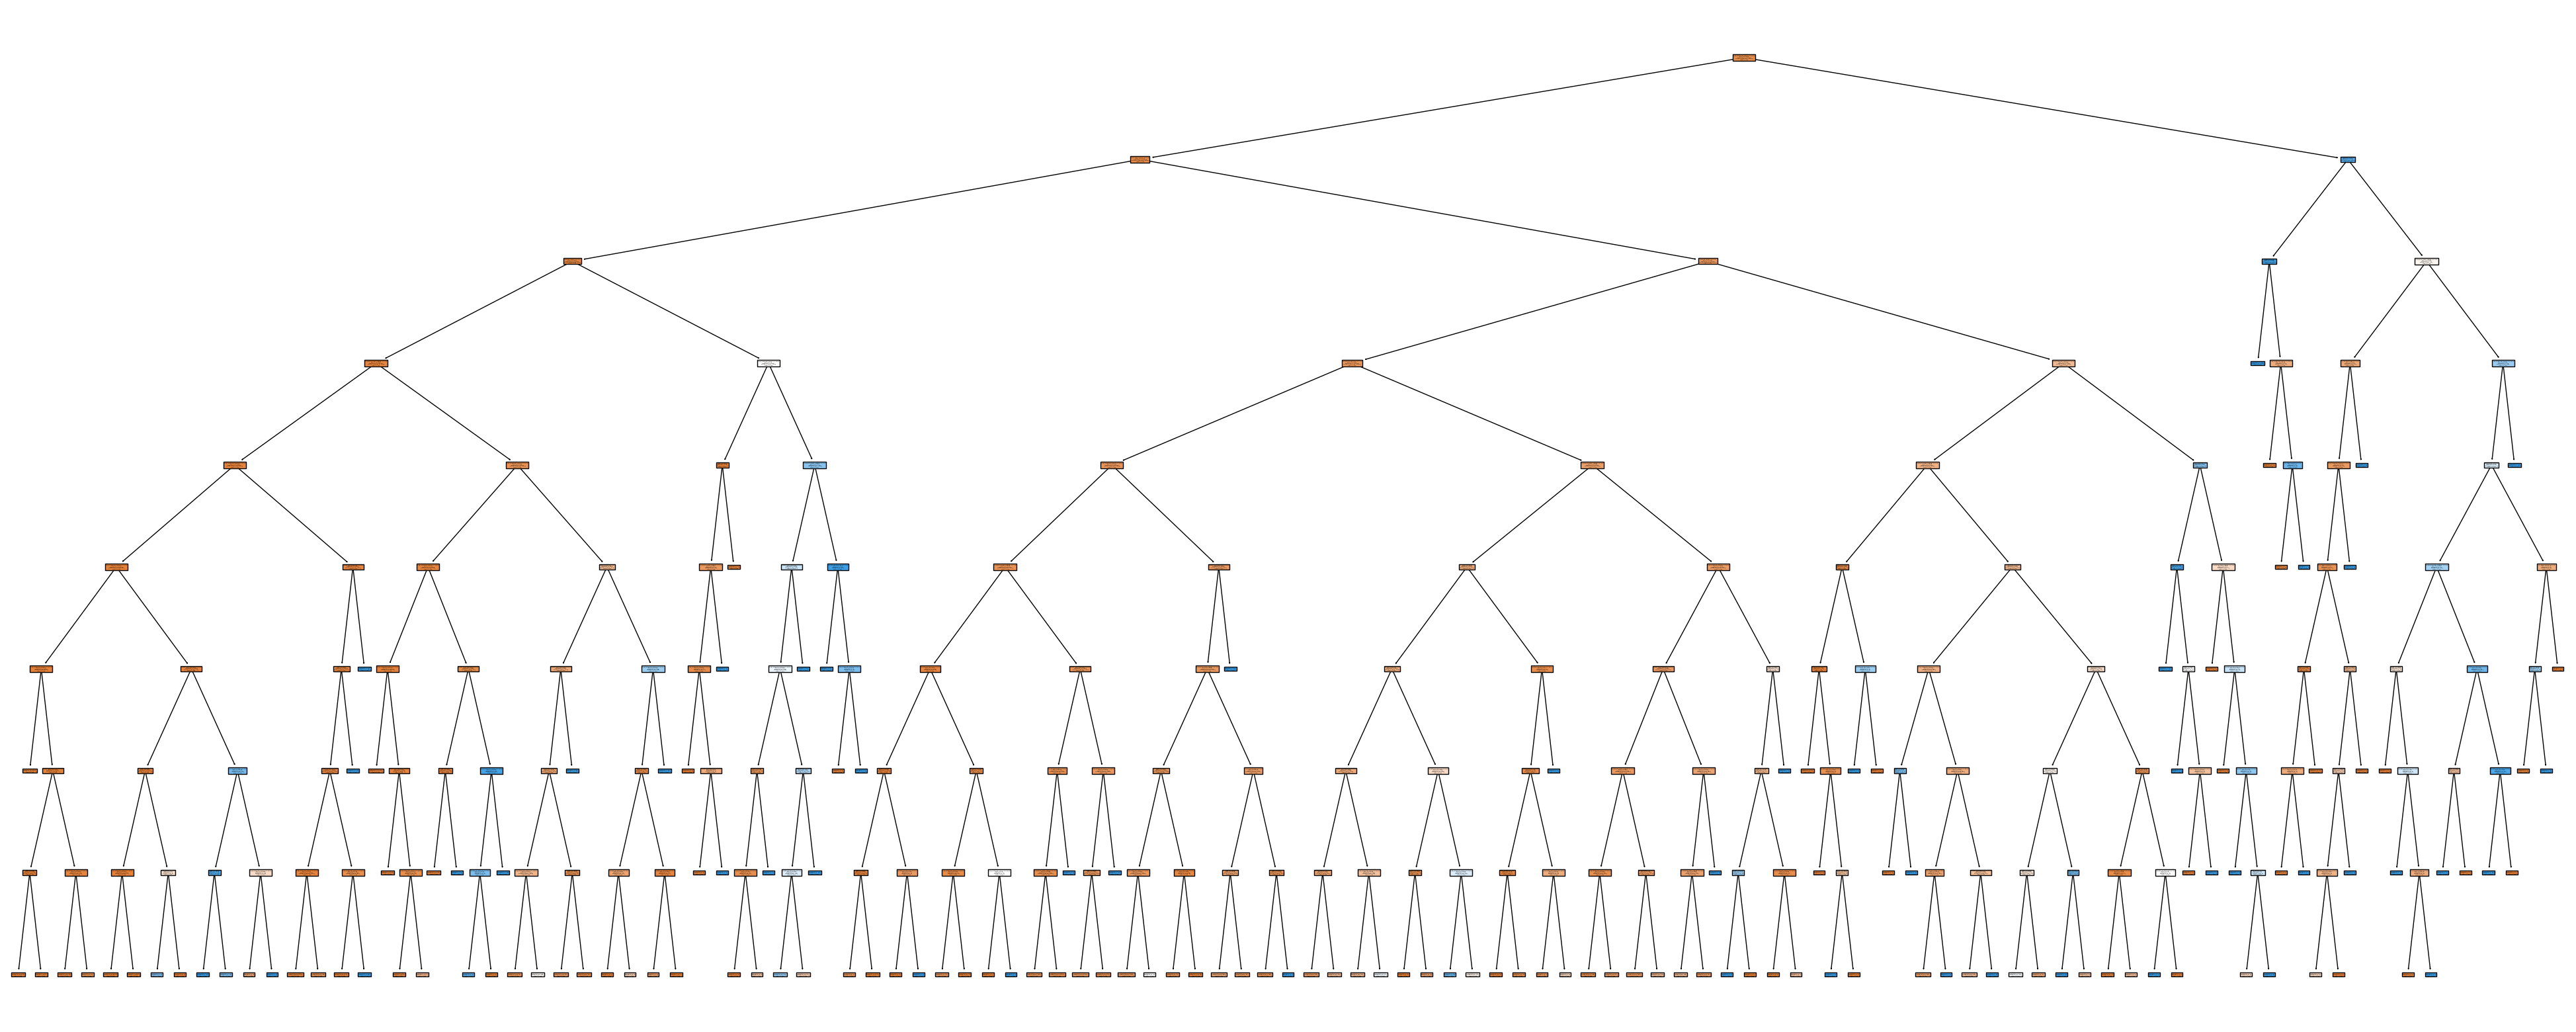

In [33]:
fig1 = plt.figure(figsize=(50,20))
_=tree.plot_tree(clf1,feature_names=Col,class_names=["No","Yes"],filled=True)
fig1.savefig("dt1.png")

In [34]:
y_pred1 = model1.predict(x_test)

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred1))

Accuracy: 0.9334671288694277


In [36]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

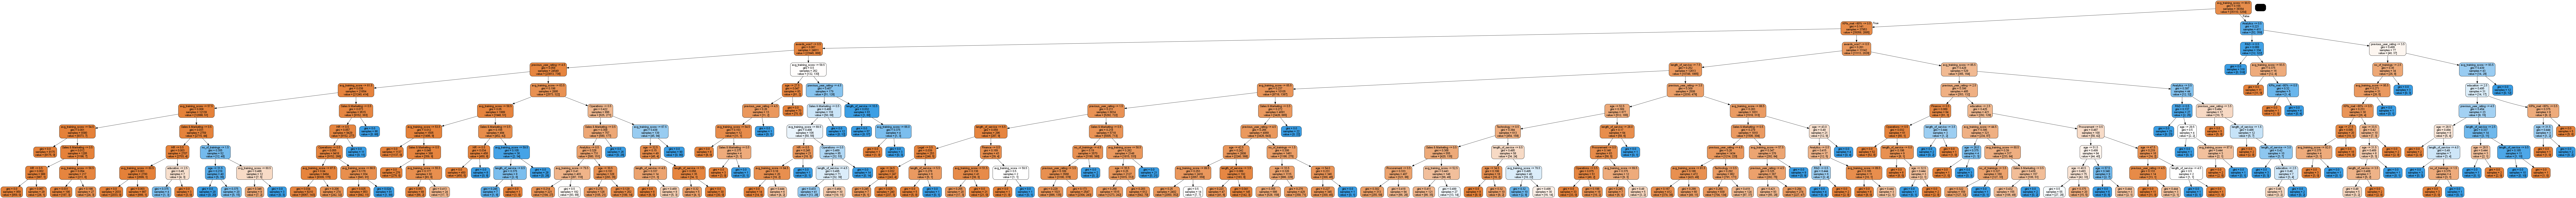

In [37]:
dot_data = export_graphviz(clf1,filled=True,rounded=True, feature_names=Col)
graph=graph_from_dot_data(dot_data)
graph.write_png('clf1.png')
Image(graph.create_png())

# Confusion Matrix - Gini Index

In [38]:
cnf_matrix1 = metrics.confusion_matrix(y_test,y_pred1)

Text(0.5, 23.52222222222222, 'Predicted Lable')

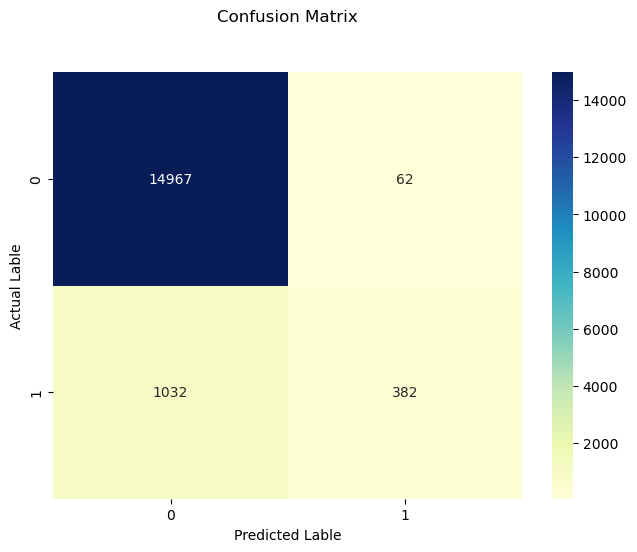

In [39]:
sns.heatmap(pd.DataFrame(cnf_matrix1),annot=True,cmap="YlGnBu",fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Lable")
plt.xlabel("Predicted Lable")

# Class Imbalance

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
sm = SMOTE(random_state=30)
x_res,y_res = sm.fit_resample(x_train,y_train)

In [42]:
print(np.bincount(y_train))

[35110  3254]


In [43]:
print(np.bincount(y_res))

[35110 35110]


In [44]:
model1=clf.fit(x_res,y_res)

In [45]:
y_pred1 = model1.predict(x_test)

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred1))

Accuracy: 0.7429301222404671


Text(0.5, 23.52222222222222, 'Predicted Label')

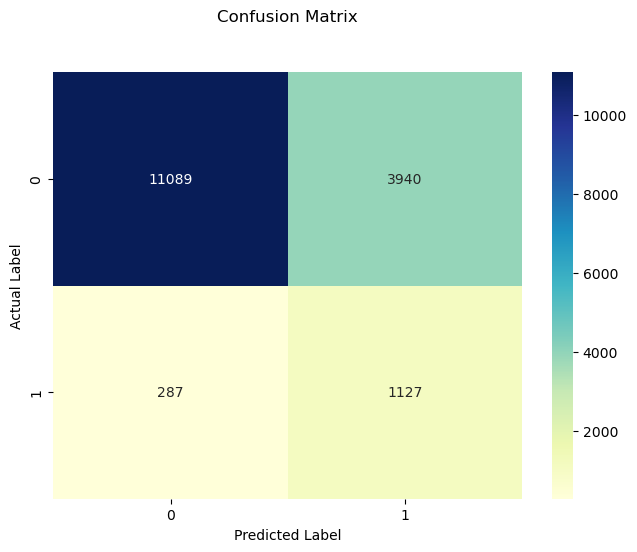

In [47]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred1)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')